In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import json



In [2]:
#dowloade the dataset from kaggle to my pc
file_path = r"C:\Users\tladi\Downloads\lending-club-metadata (1).json"

In [3]:
with open(file_path, 'r') as f:
    print(f.readline())

{"@context":{"@language":"en","@vocab":"https://schema.org/","citeAs":"cr:citeAs","column":"cr:column","conformsTo":"dct:conformsTo","cr":"http://mlcommons.org/croissant/","data":{"@id":"cr:data","@type":"@json"},"dataBiases":"cr:dataBiases","dataCollection":"cr:dataCollection","dataType":{"@id":"cr:dataType","@type":"@vocab"},"dct":"http://purl.org/dc/terms/","extract":"cr:extract","field":"cr:field","fileProperty":"cr:fileProperty","fileObject":"cr:fileObject","fileSet":"cr:fileSet","format":"cr:format","includes":"cr:includes","isEnumeration":"cr:isEnumeration","jsonPath":"cr:jsonPath","key":"cr:key","md5":"cr:md5","parentField":"cr:parentField","path":"cr:path","personalSensitiveInformation":"cr:personalSensitiveInformation","recordSet":"cr:recordSet","references":"cr:references","regex":"cr:regex","repeated":"cr:repeated","replace":"cr:replace","sc":"https://schema.org/","separator":"cr:separator","source":"cr:source","subField":"cr:subField","transform":"cr:transform","wd":"https

In [4]:
#encoding 
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)
                

In [5]:
#checking the datatype in the json file
type(data)

dict

In [6]:
#its a dictionary ,checking the keys
data.keys()

dict_keys(['@context', 'alternateName', 'conformsTo', 'license', 'distribution', 'version', 'keywords', 'isAccessibleForFree', 'includedInDataCatalog', 'creator', 'publisher', 'thumbnailUrl', 'dateModified', 'datePublished', '@type', 'name', 'url', 'description'])

In [7]:
#here checking the distribution of the data,want to find where the actual csv file is 
data['distribution']

[{'contentUrl': 'https://www.kaggle.com/api/v1/datasets/download/wordsforthewise/lending-club?datasetVersionNumber=3',
  'contentSize': '1.263 GB',
  'md5': 'WdlHVtF7NDeYjAc1CZvgfA==',
  'encodingFormat': 'application/zip',
  '@id': 'archive.zip',
  '@type': 'cr:FileObject',
  'name': 'archive.zip',
  'description': 'Archive containing all the contents of the All Lending Club loan data dataset'},
 {'includes': '*.gz',
  'containedIn': {'@id': 'archive.zip'},
  'encodingFormat': 'application/x-gzip',
  '@id': 'application-x-gzip_fileset',
  '@type': 'cr:FileSet',
  'name': 'application/x-gzip files',
  'description': 'application/x-gzip files contained in archive.zip'}]

In [8]:
#dowloaded the actual dataset from the link above and had to unzipit,and view the first 5 entries of the dataset 
import zipfile
with zipfile.ZipFile(r"C:\Users\tladi\Downloads\archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall()
df = pd.read_csv('german_credit_data.csv')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [9]:
#this is a German dataset so I had to rename the columns for better understanding
df = df.rename(columns={
    "laufkont": "checking_account_status",
    "laufzeit": "duration_months",
    "moral": "credit_history",
    "verw": "loan_purpose",
    "hoehe": "credit_amount",
    "sparkont": "savings_account",
    "beszeit": "employment_duration",
    "rate": "installment_rate",
    "famges": "personal_status",
    "buerge": "guarantors",
    "verm": "property_assets",
    "alter": "age",
    "weitkred": "other_installment_plans",
    "wohn": "housing",
    "bishkred": "existing_credits",
    "beruf": "job",
    "pers": "dependents",
    "telef": "telephone",
    "gastarb": "foreign_worker",
    "kredit": "target_credit_risk"
})

In [10]:
#checking if the renaming process was succesfull
df.head()

,checking_account_status,duration_months,credit_history,loan_purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status,guarantors,...,property_assets,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,target_credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [11]:
#now I started inspecting the dataset and perfoming some eda
df.shape

(1000, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   checking_account_status  1000 non-null   int64
 1   duration_months          1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   loan_purpose             1000 non-null   int64
 4   credit_amount            1000 non-null   int64
 5   savings_account          1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status          1000 non-null   int64
 9   guarantors               1000 non-null   int64
 10  wohnzeit                 1000 non-null   int64
 11  property_assets          1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  exist

In [13]:
#checking for null values 
df.isnull().sum()

checking_account_status    0
duration_months            0
credit_history             0
loan_purpose               0
credit_amount              0
savings_account            0
employment_duration        0
installment_rate           0
personal_status            0
guarantors                 0
wohnzeit                   0
property_assets            0
age                        0
other_installment_plans    0
housing                    0
existing_credits           0
job                        0
dependents                 0
telephone                  0
foreign_worker             0
target_credit_risk         0
dtype: int64

In [14]:
#inspecting my target variable
df["target_credit_risk"].value_counts()

target_credit_risk
1    700
0    300
Name: count, dtype: int64

In [15]:
#feartures
X = df.drop('target_credit_risk', axis=1) 

In [16]:
#target variable
y = df['target_credit_risk']

In [17]:
#split Train/Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [18]:
#Scaling feartures
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')  
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [21]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53        62
           1       0.78      0.89      0.83       138

    accuracy                           0.76       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.74      0.76      0.74       200

ROC-AUC: 0.7919588592800374


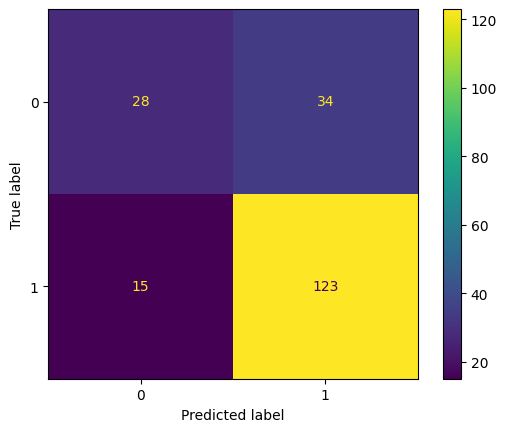

In [22]:
#checking the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [23]:
#checking which feature contributes the most in determing the credit worthiness of an individual
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)
print(feature_importance)

                    feature  coefficient
0   checking_account_status     0.684658
5           savings_account     0.462846
2            credit_history     0.395108
18                telephone     0.190857
8           personal_status     0.185096
6       employment_duration     0.182307
14                  housing     0.152533
13  other_installment_plans     0.145985
9                guarantors     0.112998
12                      age     0.106210
3              loan_purpose     0.047904
10                 wohnzeit     0.043034
17               dependents     0.032462
16                      job     0.009397
15         existing_credits    -0.125418
11          property_assets    -0.140000
19           foreign_worker    -0.255426
4             credit_amount    -0.279160
1           duration_months    -0.320595
7          installment_rate    -0.377055


In [24]:
#decided to train a different model ensure the certanity of my findings,chose the xgboost
from xgboost import XGBClassifier   

In [25]:
#here was training the model
model_2 = XGBClassifier()
model_2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [26]:
#model testing
preds = model_2.predict(X_test)
prob = model_2.predict_proba(X_test)[:, 1]

In [27]:
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53        62
           1       0.78      0.89      0.83       138

    accuracy                           0.76       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.74      0.76      0.74       200

ROC-AUC: 0.7919588592800374


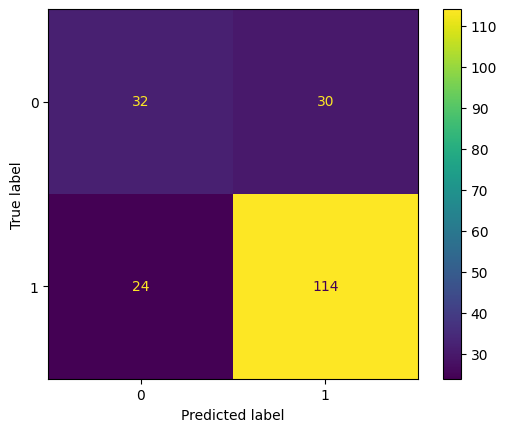

In [28]:
#looking at the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [29]:
#comparing my two models via the roc_curve and roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

lr_fpr, lr_tpr, _ = roc_curve(y_test, y_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, prob)

In [30]:
lr_auc = roc_auc_score(y_test, y_prob)
xgb_auc = roc_auc_score(y_test, prob)

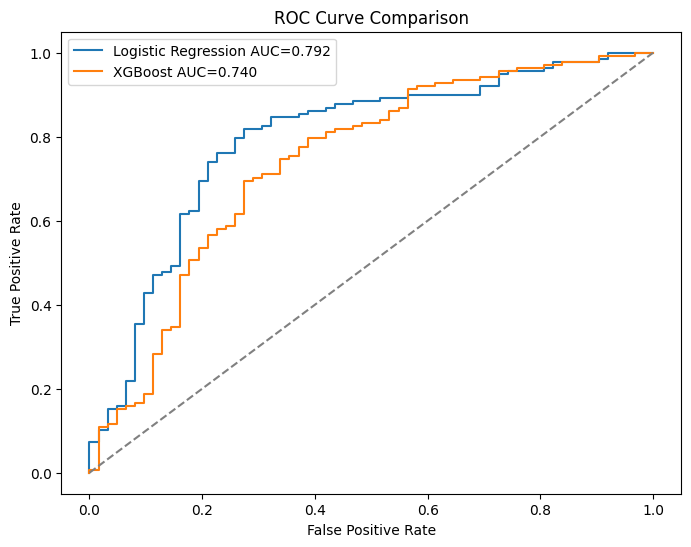

In [31]:
plt.figure(figsize=(8,6))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression AUC={lr_auc:.3f}")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost AUC={xgb_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [32]:
#conclusions
Logistic Regression outperfomed XGboost in predicting true positives giving an accuracy of almost 80%,
this model can be used in determing the credit worthiness of an individual,
looking at their(important key features) existing account status, savings account and their credit history.